# Laboratorio de regresión logística

|                |   |
:----------------|---|
| **Nombre**     | Jose Manuel Orozco Martinez   |
| **Fecha**      | 29/09/24  |
| **Expediente** |  750649 | 

La regresión logística es una herramienta utilizada para predecir respuestas cualitativas. Al igual que la regresión lineal, es un método sencillo que sirve como un punto de partida para técnicas más avanzadas. Por ejemplo, lo que se conoce como *redes neuronales* o *red de perceptrones multicapa* no es más que una estructura de regresiones logísticas que se alimentan entre sí.

1. Descarga el archivo de créditos y carga los datos (Default.csv). Utiliza `pandas`.

In [4]:
import pandas as pd 

datos= pd.read_csv("Default.csv")
datos 

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880
...,...,...,...,...
9995,No,No,711.555020,52992.378910
9996,No,No,757.962918,19660.721770
9997,No,No,845.411989,58636.156980
9998,No,No,1569.009053,36669.112360


2. Utiliza el comando `obj.head()`, donde `obj` es el nombre que le diste a los datos del archivo.

In [9]:
import pandas as pd

obj = pd.read_csv('Default.csv')

# Mostrar las primeras 5 filas de los datos 
obj.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


El comando head arroja los primeras *n* líneas (por defecto 5) de los datos que están en el DataFrame.

3. Utiliza el comando `obj.describe()`.

In [11]:
datos.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


El comando describe toma las columnas que tienen datos numéricos y saca datos estadísticos comunes:
- *n*
- media
- desviación estándar
- valor mínimo
- primer cuartil
- mediana
- tercer cuartil
- valor máximo

3. Vistos estos datos, ¿qué columnas existen en el DataFrame? ¿Qué tipo de datos contienen?

default: Indica si la persona tiene un historial de incumplimiento de pago. Es una columna categórica que contiene valores Yes (Sí) o No (No).

student: Indica si la persona es estudiante. También es una columna categórica con valores Yes o No.

balance: Representa el saldo de la cuenta de la persona. Es una columna de tipo numérico (tipo float), que contiene valores continuos.

income: Indica el ingreso anual de la persona. Al igual que balance, es una columna numérica de tipo float.

4. Configura el tipo de dato de las columnas `default` y `student` para cambiarlos a variables categóricas.

`data[columna] = data[columna].astype("category")`

In [6]:
datos["default"]=datos["default"].astype("category")
datos["student"]=datos["student"].astype("category")
datos["default"], datos["student"]

(0       No
 1       No
 2       No
 3       No
 4       No
         ..
 9995    No
 9996    No
 9997    No
 9998    No
 9999    No
 Name: default, Length: 10000, dtype: category
 Categories (2, object): ['No', 'Yes'],
 0        No
 1       Yes
 2        No
 3        No
 4        No
        ... 
 9995     No
 9996     No
 9997     No
 9998     No
 9999    Yes
 Name: student, Length: 10000, dtype: category
 Categories (2, object): ['No', 'Yes'])

In [15]:
print(datos.dtypes)

default    category
student    category
balance     float64
income      float64
dtype: object


Imagina que trabajas en un banco y que se te entregan estos datos. Tu objetivo es crear un modelo que ayude a predecir si una persona que solicita un crédito lo va a pagar. Exploremos los datos un poco más antes de crear un modelo.

Veamos primero cómo es la distribución de los valores cuando una persona dejó de pagar y cuando siguió pagando. `Default` es el término utilizado para cuando una persona dejó de pagar.

5. Crea una gráfica de caja para las columnas `income` y `balance`, con los datos agrupados con la columna `default`. Utiliza el comando `obj.boxplot(column=____, by=_____)`

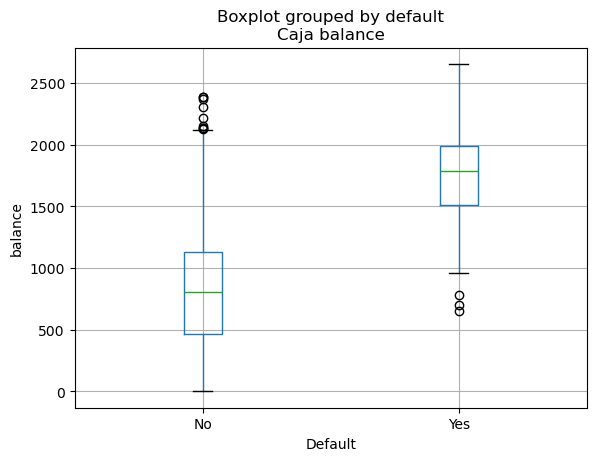

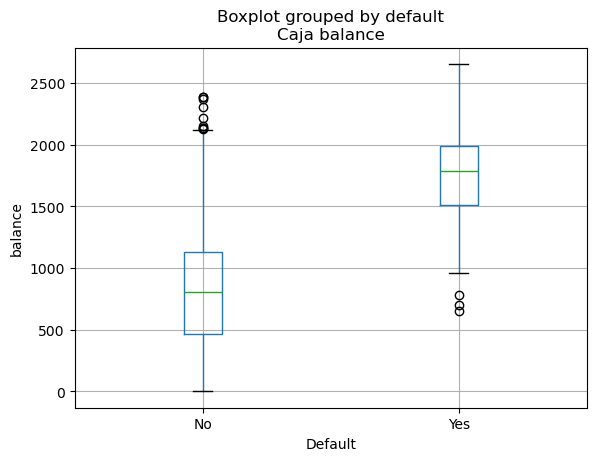

In [18]:
import matplotlib.pyplot as plt
datos.boxplot(column="balance", by="default")
plt.title("Caja balance")
plt.xlabel("Default")
plt.ylabel("balance")
plt.show()

datos.boxplot(column="balance", by="default")
plt.title("Caja balance")
plt.xlabel("Default")
plt.ylabel("balance")
plt.show()

6. Crea una gráfica de dispersión donde el eje *x* sea la columna `balance` y el eje *y* la columna `income`. Utiliza el comando `obj.plot.scatter(x, y, c="default", colormap="PiYG_r", alpha=0.5)`.

<Axes: xlabel='balance', ylabel='income'>

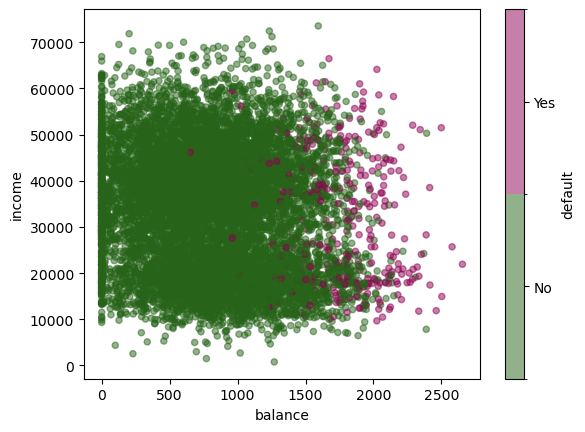

In [19]:
datos.plot.scatter(x='balance', y='income', c="default", colormap="PiYG_r", alpha=0.5)

La regresión (lineal o logística) se usa para encontrar una línea que ajuste los datos para tomar una decisión. La línea que buscamos en regresión logística es aquella que nos ayude a separar las diferentes categorías. 

<img style="float: left; " src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/decision_boundary_curve.jpg" width="400px" />


## Regresión logística simple

Creemos un modelo simple donde sólo utilizamos una de los factores para predecir una respuesta. Quiero conocer la probabilidad de que una persona deje de pagar su crédito dado el balance que tiene en su cuenta.

$$ P(\text{default}=\text{Yes}|\text{balance}) $$

Por el momento la columna default no contiene valores numéricos, por lo que hay que transformar los datos. Como default es nuestra variable de respuesta (lo que queremos predecir) podemos nombrarla *y*.

Ejecuta el código `y = obj["default"] == "Yes"`. Extrae el factor `balance` en una variable *x*.

In [40]:

y = datos["default"] == "Yes"
y = y.astype(int)
x = datos["balance"]

Crea un gráfico de dispersión donde el eje *x* sea `balance` y el eje *y* sea `default` transformado.

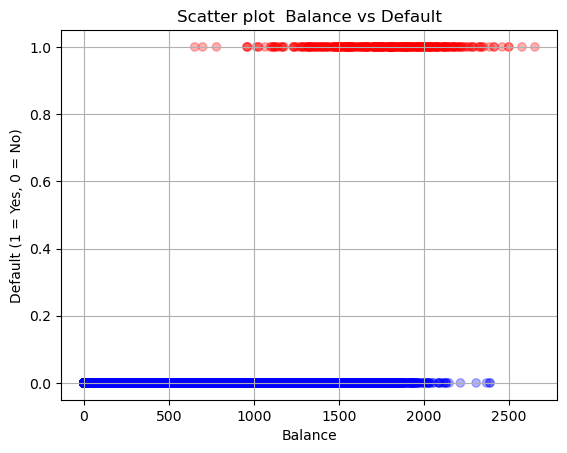

In [38]:
import matplotlib.pyplot as plt

plt.scatter(x, y, alpha=0.3, c=y, cmap='bwr')
plt.title("Scatter plot  Balance vs Default")
plt.xlabel("Balance")
plt.ylabel("Default (1 = Yes, 0 = No)")
plt.grid()
plt.show()


La línea que utilizaremos para predecir la probabilidad es:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para nuestro ejemplo de pagos y balance:

$$ P(\text{default}=1|\text{balance}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance})}} $$

Buscamos maximizar la probabilidad de que el modelo tome decisiones correctas. Es decir, que cuando `default` fue verdadero, que la predicción sea 100%, y que cuando `default` fue falso que la predicción sea 0%.

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

La función de costo ya simplificada es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

Utiliza la función `minimize` del módulo `optimize` la librería `scipy` para estimar los parámetros del modelo. Utiliza $\beta_0=-10$ y $\beta_1=0.005$ como valores iniciales.


In [52]:
import numpy as np
import scipy.optimize as opt
n=len(y)
ones=np.ones([n, 1])
balance=np.reshape(datos["balance"], [n, 1])
X=np.hstack((ones, balance))
y_vector=np.reshape(y, [n, 1])
def prediccion(beta, X): # prediccion
    return 1/(1+np.exp(-X@beta))
def J(beta, X, y): # y va a comparar
    epsilon=1e-45
    n, p=X.shape
    beta=np.reshape(beta,[p, 1])
    y_pred=prediccion(beta, X)
    e=y*np.log(y_pred+epsilon)+(1-y)*np.log(1-y_pred+epsilon)
    return -np.sum(e)
beta=[-10, -.0005]
rrs=opt.minimize(J, beta, args=(X, y_vector))
rrs

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 798.2258422360521
        x: [-1.065e+01  5.499e-03]
      nit: 13
      jac: [ 0.000e+00  7.629e-06]
 hess_inv: [[ 2.280e-06 -1.312e-09]
            [-1.312e-09  1.715e-09]]
     nfev: 102
     njev: 34

Muchos aspectos de la regresión logística son similares a la regresión lineal. Podemos medir la precisión de nuestros estimados calculando sus errores estándar. El objetivo de calcular estos errores es asegurar que hay una relación estadísticamente significativa entre el factor y la variable de respuesta.

Los errores estándar se obtienen con el siguiente procedimiento:

1. Calcula las predicciones utilizando los $\beta_0$ y $\beta_1$ encontrados.

In [48]:
pr = prediccion(rrs.x,X)
pr 

array([1.30592143e-03, 2.11294683e-03, 8.59570272e-03, ...,
       2.46690908e-03, 1.16760495e-01, 7.14687008e-05])

2. Idealmente la probabilidad debería ser 100% o 0%. Si alguna predicción no fue absoluta significa que hay incertidumbre. Calcula $p(1-p)$ para todas tus predicciones.

In [140]:
Calc_p=pr*(1-pr)
Calc_p

array([1.30421600e-03, 2.10848229e-03, 8.52181662e-03, ...,
       2.46082344e-03, 1.03127481e-01, 7.14635930e-05])

3. Crea una matriz vacía y llena la diagonal con las probabilidades encontradas.

`V = np.diagflat(*p(1-p)*)`

In [62]:
# Crear una matriz diagonal 
V = np.diagflat(Calc_p)
V

array([[1.30421600e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.10848229e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.52181662e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.46082344e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.03127481e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.14635930e-05]])

4. Calcula la matriz de covarianza. (Dado que X es la matriz que contiene todos los factores)

`cov = np.linalg.inv(X.T @ V @ X)`

In [64]:
cov = np.linalg.inv(X.T @ V @ X)
cov


array([[ 1.30430885e-01, -7.81688634e-05],
       [-7.81688634e-05,  4.85616677e-08]])

5. Los valores en la diagonal de la matriz de covarianza corresponden a la varianza de los factores. Utiliza los valores de la diagonal para calcular el error estándar.

`se = np.sqrt(np.diag(cov))`

In [136]:
error_estandar = np.sqrt(np.diag(cov))
error_estandar

array([3.61152163e-01, 2.20367120e-04])

Ahora, revisemos si los estimados de nuestros coeficientes demuestran que hay una relación significativa entre los factores y la respuesta.

Calculamos el estadístico *z*

$$ z_j = \frac{\hat{\beta_j}}{\text{SE}(\hat{\beta_j})} $$

In [72]:
# Calcular el estadístico z para cada parámetro estimado
z_estadistico=rrs.x/se
z_estadistico

array([-29.49170083,  24.95248051])

Utilizamos el estadístico *z* para encontrar el *p-value*.

`from scipy.stats import norm`

`p_value = 2 * (1 - norm.cdf(abs(z_statistic)))`

In [74]:
from scipy.stats import norm

p_valor = 2 * (1 - norm.cdf(abs(z_estadistico)))
p_valor

array([0., 0.])

¿Es significativa la relación de los factores con la variable de respuesta?

Al comparar los valores de z con el valor crítico, puedes determinar si hay una relación importante entre los factores y la variable de respuesta. Esto proporciona una base para evaluar la validez del modelo y las contribuciones de cada variable independiente.

Repite el procedimiento con el factor `student`. 
1. Transforma el factor de {"Yes", "No"} a {1, 0}.
2. Utiliza `minimize` para estimar los coeficientes. Utiliza $\beta_0 = -3.5$ y $\beta_1 = 0.4$ como punto de partida.
3. Calcula el error estándar de tus estimaciones.
   1. Usa tu modelo para encontrar $\hat{p}(X)$
   2. Calcula el error $p(1-p)$
   3. Calcula la matriz de covarianza
   4. Extrae el error estándar
5. Argumenta si los factores son significativos utilizando el *p-value*.
   1. Utiliza el error estándar para calcular el estadístico *z*
   2. Calcula el *p-value*
   3. ¿Son significativos?


1-. Transforma el factor de {"Yes", "No"} a {1, 0}.

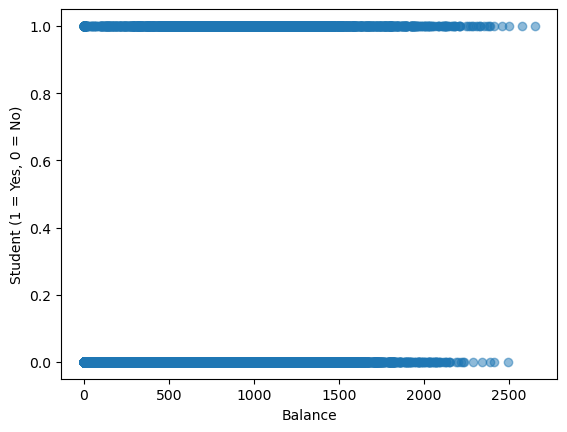

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: student_num, Length: 10000, dtype: category
Categories (2, int64): [0, 1]

In [148]:
y1=datos["default"]=="Yes"
x1=datos["student"]

# Transformar la columna 'default' en valores numéricos
datos['student_num'] = datos['student'].map({'Yes': 1, 'No': 0}) 
# Crear la gráfica de dispersión
plt.scatter(datos['balance'], datos['student_num'], alpha=0.5)
# Etiquetas y título
plt.title('')
plt.xlabel('Balance')
plt.ylabel('Student (1 = Yes, 0 = No)')

# Mostrar la gráfica
plt.show()
datos['student_num']

2-. Utiliza `minimize` para estimar los coeficientes. Utiliza $\beta_0 = -3.5$ y $\beta_1 = 0.4$ como punto de partida.

In [82]:
n1=len(y1)
ones1=np.ones([n1, 1])
student=np.reshape(datos["student_num"], [n1, 1])
X1=np.hstack((ones1, student))
y_vector1=np.reshape(y1, [n1, 1])
def prediccion1(beta1, X1): # prediccion
    return 1/(1+np.exp(-X1@beta1))
def J1(beta1, X1, y1): # y va a comparar
    epsilon=1e-10
    n1, p1=X1.shape
    beta1=np.reshape(beta1,[p1, 1])
    y_pred1=prediccion1(beta1, X1)
    e1=y1*np.log(y_pred1+epsilon)+(1-y1)*np.log(1-y_pred1+epsilon)
    return -np.sum(e1)
beta1=[-3.5, .4]
rrs1=opt.minimize(J1, beta1, args=(X1, y_vector1))
rrs1

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1454.341529987519
        x: [-3.504e+00  4.049e-01]
      nit: 6
      jac: [ 7.629e-05 -1.526e-05]
 hess_inv: [[ 7.010e-12  9.628e-11]
            [ 9.628e-11  3.792e-01]]
     nfev: 48
     njev: 16

3-.Calcula el error estándar de tus estimaciones


A-.Usa tu modelo para encontrar $\hat{p}(X)$]

In [90]:
pr1=prediccion1(rrs1.x, X1)
pr1

array([0.02919501, 0.04313859, 0.02919501, ..., 0.02919501, 0.02919501,
       0.04313859])

B-.Calcula el error $p(1-p)$

In [92]:
error_p=pr1*(1-pr1)
error_p


array([0.02834266, 0.04127765, 0.02834266, ..., 0.02834266, 0.02834266,
       0.04127765])

C-. Calcula la matriz de covarianza

In [150]:
V1=np.diagflat(error_p)
cov1 = np.linalg.inv(X1.T @ V1 @ X1)
cov1

array([[ 0.00500035, -0.00500035],
       [-0.00500035,  0.01322936]])

D-.  Extrae el error estándar

In [108]:
error_estandar = np.sqrt(np.diag(cov1))
error_estandar

array([0.07071318, 0.11501894])

4. Argumenta si los factores son significativos utilizando el *p-value*.


  A-. Utiliza el error estándar para calcular el estadístico *z*

In [116]:
estadistico_z = rrs1.x / error_estandar
estadistico_z

array([-49.55409497,   3.52017669])

B-.Calcula el *p-value*

In [118]:
from scipy.stats import norm
p_valor = 2 * (1 - norm.cdf(np.abs(estadistico_z)))
p_valor

array([0.        , 0.00043126])

C-.¿Son significativos?


puedo concluir que la relación de los factores (en este caso, el estado de estudiante) con la variable de respuesta (default) es significativa. Esto sugiere que ser estudiante tiene un impacto significativo en la probabilidad de que ocurra un incumplimiento (default)

## Regresión logística múltiple

Considera ahora el caso de múltiples factores. Intentemos predecir si la persona dejará de pagar su crédito utilizando toda la información que tenemos disponible. I.e.

$$ P(\text{default}=1|\text{balance}, \text{income}, \text{student}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance} + \beta_2 \text{income} + \beta_3 \text{student})}} $$

1. Utiliza `minimize` para estimar los coeficientes. Utiliza los siguientes valores como punto de partida:
   - $\beta_0 = -10$
   - $\beta_1 = 0.005$
   - $\beta_2 = 0.003$
   - $\beta_3 = -0.65$
2. Calcula el error estándar de tus estimaciones.
3. Argumenta si los factores son significativos utilizando el *p-value*. 

In [128]:
balance, student, y
x3=datos["income"]
income=np.reshape(datos["income"], [n, 1])
ones, balance,income, student
X_T= np.hstack((ones, balance, income, student))
def prediccion3(beta3, X_T): 
    return 1/(1+np.exp(-X_T@beta3))
def J3 (beta3, X_T, y): 
    epsilon=1e-45
    n, p3=X_T.shape
    beta=np.reshape(beta3, [p3, 1])
    y_pred3=prediccion3(beta3, X_T)
    e=y*np.log(y_pred3+epsilon)+(1-y)*np.log(1-y_pred3+epsilon)
    return -np.sum(e)
beta3=[-10, .005, .003, -.65]
rr3=opt.minimize(J3, beta3, args=(X_T, y_vector))
rr3

C:\Users\pepeg\AppData\Local\Temp\ipykernel_34452\3926041737.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X_T@beta3))


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 345042376.1851577
        x: [-1.000e+01 -1.566e-02 -1.007e+00 -6.500e-01]
      nit: 1
      jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[1 0 0 0]
            [0 1 0 0]
            [0 0 1 0]
            [0 0 0 1]]
     nfev: 10
     njev: 2

In [152]:
pr3=prediccion3(rr3.x, X_T)
error_p3=pr3*(1-pr3)
V3=np.diagflat(error_p3)
cov3 = np.linalg.inv(X_T.T @ V3 @ X_T)
error_estandar3 = np.sqrt(np.diag(cov3))
estadistico_z3=rrs3.x/error_estandar3
p_valor3=2 * (1 - norm.cdf(abs(estadistico_z3)))
#no logro entender por que no se ejecuta

C:\Users\pepeg\AppData\Local\Temp\ipykernel_34452\3926041737.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X_T@beta3))


LinAlgError: Singular matrix

Los factores son significativos si sus p-valores son menores a 0.05.

¿Cómo sabemos qué tan bueno es el modelo? Hay cuatro posibles casos para un problema de clasificación simple:
- Era sí y se predijo sí. (Verdadero positivo **TP**)
- Era sí y se predijo no. (Falso negativo **FN**)
- Era no y se predijo sí. (Falso positivo **FP**)
- Era no y se predijo no. (Verdadero negativo **TN**)

De esos cuatro casos hay dos donde el modelo es correcto y dos donde el modelo no es correcto.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IuymDnZpRlkat0qejE26Nw.png)

1. Menciona dos ejemplos donde consideres que un falso positivo sea un peor resultado que un falso negativo.

#### Ejemplo 1: Sistema de alarma de seguridad.
En un sistema de alarmas de seguridad para una propiedad, un falso positivo ocurre cuando la alarma se activa sin que haya un intruso presente, lo que puede resultar en la movilización innecesaria de la policía y causar molestias a los propietarios o vecinos. Esto podría llevar a una desensibilización ante las alarmas y a una falta de respuesta en caso de un verdadero intento de robo.

#### Ejemplo 2: Diagnóstico en salud mental.
En el diagnóstico de trastornos de salud mental, un falso positivo puede resultar en una persona que recibe un diagnóstico incorrecto (por ejemplo, ser diagnosticado erróneamente con depresión) y, por lo tanto, comienza un tratamiento (como medicamentos) que no necesita. Esto puede generar efectos secundarios, estigmatización y un impacto negativo en la vida de la persona. 

2. Menciona dos ejemplos donde consideres que un falso negativo sea un peor resultado que un falso positivo.

#### Ejemplo 1 Una de las mas obvias deteccion de cancer.
En las pruebas de detección de cáncer, como la mamografía para el cáncer de mama o la colonoscopia para el cáncer colorrectal, un falso negativo significa que la prueba indica que no hay cáncer cuando en realidad sí lo hay. Esto puede llevar a que un paciente no reciba el tratamiento necesario, lo que podría resultar en un avance de la enfermedad y disminuir las probabilidades de supervivencia. 

#### Ejemplo 2: Deteccion de fraudes financieros.

En el ámbito de la detección de fraudes en tarjetas de crédito, un falso negativo ocurre cuando una transacción fraudulenta no es detectada y se aprueba. Esto puede resultar en pérdidas financieras significativas para la institución financiera y para el cliente. Un cliente afectado podría sufrir un daño financiero que tardaría tiempo en recuperarse.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3